## **Project Predictive Analytics**

### 2010512093 - Muhammad Raziv Maulana Ranie

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

In [2]:
df = pd.read_csv('data_retail.csv')
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1.538718e+12,1467681.0,22.0
1,2,2,29531,Sepatu,1406077331494,1.545736e+12,1269337.0,41.0
2,3,3,141526,Tas,1493349147000,1.548323e+12,310915.0,30.0
3,4,4,141526,Jaket,1493362372547,1.547644e+12,722632.0,27.0
4,5,5,37545,Sepatu,1429178498531,1.542891e+12,1775036.0,25.0


## Exploratory dataset

In [3]:
df.columns

Index(['no', 'Row_Num', 'Customer_ID', 'Product', 'First_Transaction',
       'Last_Transaction', 'Average_Transaction_Amount', 'Count_Transaction'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16615 entries, 0 to 16614
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no                          16615 non-null  int64  
 1   Row_Num                     16615 non-null  int64  
 2   Customer_ID                 16615 non-null  int64  
 3   Product                     16615 non-null  object 
 4   First_Transaction           16615 non-null  int64  
 5   Last_Transaction            16614 non-null  float64
 6   Average_Transaction_Amount  16614 non-null  float64
 7   Count_Transaction           16614 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.0+ MB


In [5]:
df.dtypes

no                              int64
Row_Num                         int64
Customer_ID                     int64
Product                        object
First_Transaction               int64
Last_Transaction              float64
Average_Transaction_Amount    float64
Count_Transaction             float64
dtype: object

In [6]:
df.describe()

,no,Row_Num,Customer_ID,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
count,16615.000000,16615.000000,16615.000000,1.661500e+04,1.661400e+04,1.661400e+04,16614.000000
mean,8308.000000,8308.000000,81758.459765,1.460759e+12,1.537055e+12,1.350367e+06,50.304021
std,4796.481697,4796.481697,74314.954189,3.725005e+10,1.761627e+10,9.182051e+05,63.901782
min,1.000000,1.000000,654.000000,1.000000e+00,1.423654e+12,1.011250e+05,21.000000
25%,4154.500000,4154.500000,37683.500000,1.432323e+12,1.534518e+12,7.759408e+05,26.000000
50%,8308.000000,8308.000000,59018.000000,1.462500e+12,1.544470e+12,1.187693e+06,34.000000
75%,12461.500000,12461.500000,106311.500000,1.490373e+12,1.547731e+12,1.682393e+06,54.000000
max,16615.000000,16615.000000,765243.000000,1.544229e+12,1.549065e+12,9.848073e+06,3550.000000


In [7]:
df.nunique()

no                            16615
Row_Num                       16615
Customer_ID                   12975
Product                           4
First_Transaction             16552
Last_Transaction              16549
Average_Transaction_Amount    16492
Count_Transaction               302
dtype: int64

## Data Preparation

In [8]:
df.isnull().sum()

no                            0
Row_Num                       0
Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              1
Average_Transaction_Amount    1
Count_Transaction             1
dtype: int64

In [9]:
df.dropna( how='any', inplace=True)

In [10]:
df.isnull().sum()

no                            0
Row_Num                       0
Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
dtype: int64

In [11]:
df.drop(['no','Row_Num'], axis=1, inplace=True)
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jaket,1466304274396,1.538718e+12,1467681.0,22.0
1,29531,Sepatu,1406077331494,1.545736e+12,1269337.0,41.0
2,141526,Tas,1493349147000,1.548323e+12,310915.0,30.0
3,141526,Jaket,1493362372547,1.547644e+12,722632.0,27.0
4,37545,Sepatu,1429178498531,1.542891e+12,1775036.0,25.0


In [12]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction'], unit='ms')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction'], unit='ms')
df.dtypes

Customer_ID                            int64
Product                               object
First_Transaction             datetime64[ns]
Last_Transaction              datetime64[ns]
Average_Transaction_Amount           float64
Count_Transaction                    float64
dtype: object

In [13]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608000000,1467681.0,22.0
1,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270000128,1269337.0,41.0
2,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000000000,310915.0,30.0
3,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911000064,722632.0,27.0
4,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.529999872,1775036.0,25.0


In [14]:
df['First_TransactionByYear'] = df['First_Transaction'].dt.year
df['Last_TransactionByYear'] = df['Last_Transaction'].dt.year
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,First_TransactionByYear,Last_TransactionByYear
0,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608000000,1467681.0,22.0,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270000128,1269337.0,41.0,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000000000,310915.0,30.0,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911000064,722632.0,27.0,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.529999872,1775036.0,25.0,2015,2018


In [15]:
df.loc[df['Last_Transaction'] <= dt.datetime(2018,8,1,0,0,0), 'Churn']=1
df.loc[df['Last_Transaction'] > dt.datetime(2018,8,1,0,0,0), 'Churn']=0
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,First_TransactionByYear,Last_TransactionByYear,Churn
0,29531,Jaket,2016-06-19 02:44:34.396,2018-10-05 05:48:02.608000000,1467681.0,22.0,2016,2018,0.0
1,29531,Sepatu,2014-07-23 01:02:11.494,2018-12-25 11:02:41.270000128,1269337.0,41.0,2014,2018,0.0
2,141526,Tas,2017-04-28 03:12:27.000,2019-01-24 09:40:02.000000000,310915.0,30.0,2017,2019,0.0
3,141526,Jaket,2017-04-28 06:52:52.547,2019-01-16 13:00:03.911000064,722632.0,27.0,2017,2019,0.0
4,37545,Sepatu,2015-04-16 10:01:38.531,2018-11-22 12:53:41.529999872,1775036.0,25.0,2015,2018,0.0


In [16]:
df['Product'] = LabelEncoder().fit_transform(df['Product'])

## Exploratory data analysis

In [17]:
df["Churn"].value_counts()

0.0    12776
1.0     3838
Name: Churn, dtype: int64

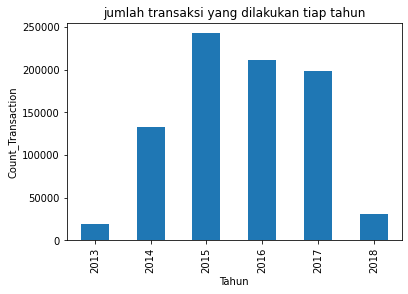

In [18]:
df_byyear = df.groupby(['First_TransactionByYear'])['Count_Transaction'].sum()
df_byyear.plot(x='First_TransactionByYear', y = 'Count_Transaction', kind='bar')
plt.title('jumlah transaksi yang dilakukan tiap tahun')
plt.xlabel('Tahun')
plt.ylabel('Count_Transaction')
plt.show()

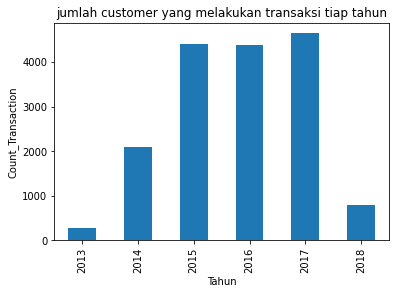

In [19]:
df_byyear = df.groupby(['First_TransactionByYear'])['Customer_ID'].count()
df_byyear.plot(x='First_TransactionByYear', y = 'Customer_ID', kind='bar')
plt.title('jumlah customer yang melakukan transaksi tiap tahun')
plt.xlabel('Tahun')
plt.ylabel('Count_Transaction')
plt.show()

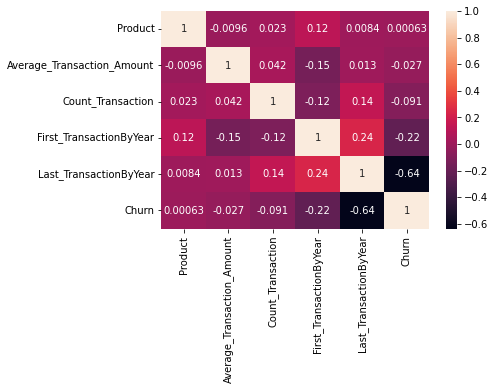

In [20]:
df.drop(['Customer_ID'], axis=1, inplace=True)
sns.heatmap(df.corr(),annot=True)

# Modeling

In [21]:
df['Range_year'] = df['Last_TransactionByYear']-df['First_TransactionByYear']

features=['Average_Transaction_Amount','Count_Transaction','Range_year']
X=df[features]
y=df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


DecisionTree

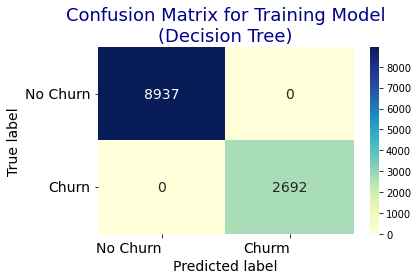

In [22]:
dec_model = DecisionTreeClassifier().fit(x_train, y_train)

y_train_pred = dec_model.predict(x_train)

y_test_pred = dec_model.predict(x_test)

confusion_matrix_trainig_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churm'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_trainig_dt, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
print('Classification Report Training Model (Decision Tree) :')
print(classification_report(y_train, y_train_pred))
print(f'Accuracy Training Score Decision Tree : {accuracy_score(y_train, y_train_pred)}')

Classification Report Training Model (Decision Tree) :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8937
         1.0       1.00      1.00      1.00      2692

    accuracy                           1.00     11629
   macro avg       1.00      1.00      1.00     11629
weighted avg       1.00      1.00      1.00     11629

Accuracy Training Score Decision Tree : 1.0


test

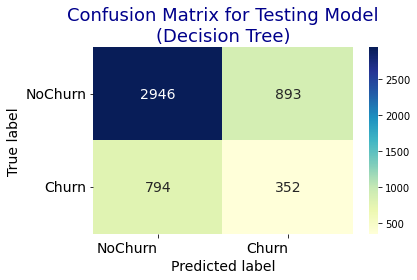

In [24]:
confusion_matrix_test_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('NoChurn', 'Churn'), ('NoChurn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_dt, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [25]:
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_test, y_test_pred))
print(f'Accuracy Test Score Decision Tree : {accuracy_score(y_test, y_test_pred)}')

Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      3839
         1.0       0.28      0.31      0.29      1146

    accuracy                           0.66      4985
   macro avg       0.54      0.54      0.54      4985
weighted avg       0.67      0.66      0.67      4985

Accuracy Test Score Decision Tree : 0.6615847542627884


Logistic Regression

In [26]:
log_model = LogisticRegression().fit(x_train, y_train)

y_train_pred = log_model.predict(x_train)

y_test_pred= log_model.predict(x_test)

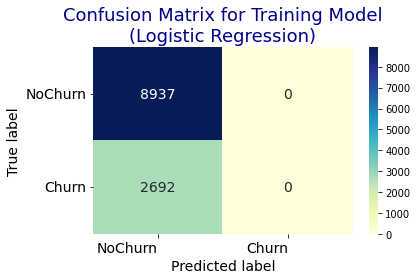

In [27]:
confusion_matrix_training_lr= pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('NoChurn', 'Churn'), ('NoChurn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_training_lr, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [28]:
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))
print(f'Accuracy Train Score Logistic Regression :{accuracy_score(y_train, y_train_pred)}')

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      8937
         1.0       0.00      0.00      0.00      2692

    accuracy                           0.77     11629
   macro avg       0.38      0.50      0.43     11629
weighted avg       0.59      0.77      0.67     11629

Accuracy Train Score Logistic Regression :0.7685097600825522


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


testing t

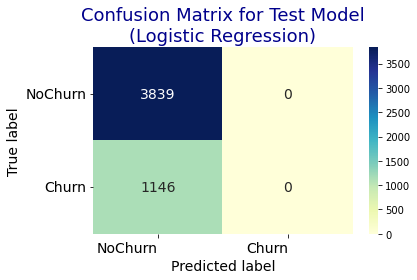

In [29]:
confusion_matrix_test_lr = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('NoChurn', 'Churn'), ('NoChurn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_lr, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Test Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [30]:
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))
print(f'Accuracy Test Score Logistic Regression : {accuracy_score(y_test, y_test_pred)}')

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      3839
         1.0       0.00      0.00      0.00      1146

    accuracy                           0.77      4985
   macro avg       0.39      0.50      0.44      4985
weighted avg       0.59      0.77      0.67      4985

Accuracy Test Score Logistic Regression : 0.770110330992979


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost

In [31]:
xgboost_model = XGBClassifier().fit(x_train, y_train)

y_train_pred = xgboost_model.predict(x_train)

y_test_pred= xgboost_model.predict(x_test)

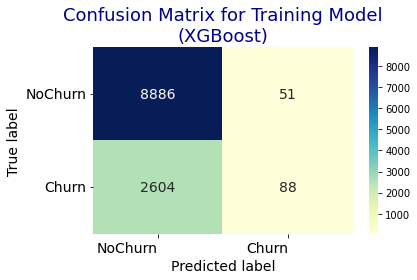

In [32]:
confusion_matrix_training_xgb = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('NoChurn', 'Churn'), ('NoChurn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_training_xgb, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(XGBoost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
print('Classification Report Testing Model (XGB) :')
print(classification_report(y_train, y_train_pred))
print(f'Accuracy Test Score XGB : {accuracy_score(y_train, y_train_pred)}')

Classification Report Testing Model (XGB) :
              precision    recall  f1-score   support

         0.0       0.77      0.99      0.87      8937
         1.0       0.63      0.03      0.06      2692

    accuracy                           0.77     11629
   macro avg       0.70      0.51      0.47     11629
weighted avg       0.74      0.77      0.68     11629

Accuracy Test Score XGB : 0.7716914610026657


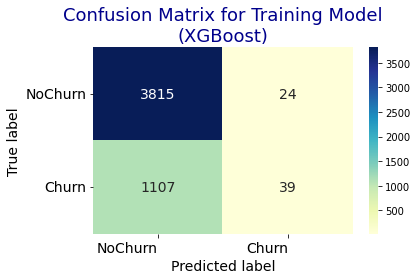

In [34]:
confusion_matrix_test_xgb = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('NoChurn', 'Churn'), ('NoChurn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_xgb, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(XGBoost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [35]:
print('Classification Report Testing Model (XGB) :')
print(classification_report(y_test, y_test_pred))
print(f'Accuracy Test Score XGB : {accuracy_score(y_test, y_test_pred)}')

Classification Report Testing Model (XGB) :
              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87      3839
         1.0       0.62      0.03      0.06      1146

    accuracy                           0.77      4985
   macro avg       0.70      0.51      0.47      4985
weighted avg       0.74      0.77      0.69      4985

Accuracy Test Score XGB : 0.7731193580742227


Random Forrest

In [36]:
rf_model = RandomForestClassifier().fit(x_train, y_train)

y_train_pred = rf_model.predict(x_train)

y_test_pred= rf_model.predict(x_test)

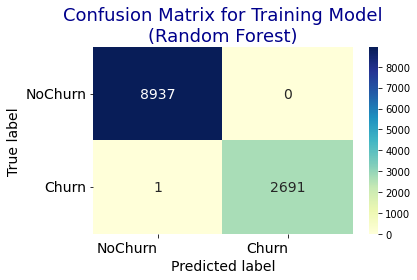

In [37]:
confusion_matrix_training_rf= pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('NoChurn', 'Churn'), ('NoChurn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_training_rf, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [38]:
print('Classification Report Testing Model (RF) :')
print(classification_report(y_train, y_train_pred))
print(f'Accuracy Test Score RF : {accuracy_score(y_train, y_train_pred)}')

Classification Report Testing Model (RF) :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8937
         1.0       1.00      1.00      1.00      2692

    accuracy                           1.00     11629
   macro avg       1.00      1.00      1.00     11629
weighted avg       1.00      1.00      1.00     11629

Accuracy Test Score RF : 0.9999140080832402


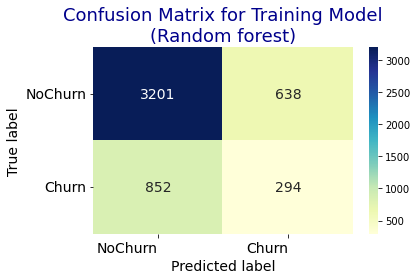

In [39]:
confusion_matrix_test_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('NoChurn', 'Churn'), ('NoChurn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_rf, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [40]:
print('Classification Report Testing Model (RF) :')
print(classification_report(y_test, y_test_pred))
print(f'Accuracy Test Score RF : {accuracy_score(y_test, y_test_pred)}')

Classification Report Testing Model (RF) :
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      3839
         1.0       0.32      0.26      0.28      1146

    accuracy                           0.70      4985
   macro avg       0.55      0.55      0.55      4985
weighted avg       0.68      0.70      0.69      4985

Accuracy Test Score RF : 0.7011033099297894


# Kesimpulan#
pada ke empat model yang telah dilakukan, dapat disimpulkan:
1. model DecisionTree, pada model ini nilai akurasi data training sebesar 1.0 dan data testing sebesar 0.66 sehingga model dikatakan tidak baik karena jarak nilai akurasi antara data training dan data testing pada model ini menimbulkan over fitting
2. model logisticRegression, pada ini nilai akurasi data training sebesar 0.76 dan data testing sebesar 0.77 sehingga model dikatakan tidak baik karena jarak nilai akurasi antara data training dan data testing pada model ini menimbulkan under fitting
3. model XGBoost, pada ini nilai akurasi data training sebesar 0.77 dan data testing sebesar 0.77 sehingga model ini dikatakan baik, tidak menimbulkan over fitting dan under fitting.
4. model RandomForest, pada ini nilai akurasi data training sebesar 0.99 dan data testing sebesar 0.70 ehingga model dikatakan tidak baik karena jarak nilai akurasi antara data training dan data testing pada model ini menimbulkan over fitting

Dapat disimpulkan model yang paling baik diantara ke empat model tersebut adalah model XGboost